<a href="https://colab.research.google.com/github/pasdptt/PasdPublicNB/blob/master/Review_Python_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Review Python (for Statistician, class 2)

In [3]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

newline = "\r\n"

In [4]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
x

[8.0, 1, 2.5, 4, 28.0]

In [5]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(newline,y,newline,y_with_nan)


 [ 8.   1.   2.5  4.  28. ] 
 [ 8.   1.   2.5  nan  4.  28. ]


#Measures of Variability
The measures of central tendency aren’t sufficient to describe data. You’ll also need the measures of variability that quantify the spread of data points. In this section, you’ll learn how to identify and calculate the following variability measures:

* Variance
* Standard deviation
* Skewness
* Percentiles
* RangesNew Section

##Variance
The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. You can express the sample variance of the dataset 𝑥 with 𝑛 elements mathematically as 𝑠² = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥. If you want to understand deeper why you divide the sum with 𝑛 − 1 instead of 𝑛, then you can dive deeper into Bessel’s correction.

The following figure shows you why it’s important to consider the variance when describing datasets:

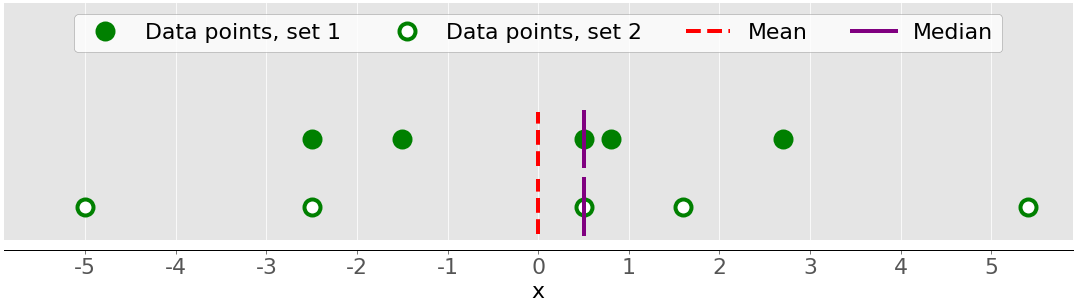

Python Statistics
There are two datasets in this figure:

1. **Green dots:** This dataset has a smaller variance or a smaller average difference 
from the mean. It also has a smaller range or a smaller difference between the largest and smallest item.
2. **White dots:** This dataset has a larger variance or a larger average difference from the mean. It also has a bigger range or a bigger difference between the largest and smallest item.
Note that these two datasets have the same mean and median, even though they appear to differ significantly. Neither the mean nor the median can describe this difference. That’s why you need the measures of variability.

Here’s how you can calculate the sample variance with pure Python:

In [ ]:
n = len(x)
mean_ = sum(x) / n
var_ = 
var_

This approach is sufficient and calculates the sample variance well. However, the shorter and more elegant solution is to call the existing function statistics.variance():

In [ ]:
var_ = 
var_

You’ve obtained the same result for the variance as above. variance() can avoid calculating the mean if you provide the mean explicitly as the second argument: statistics.variance(x, mean_).

If you have nan values among your data, then statistics.variance() will return nan:

In [ ]:
var_ = 
var_

In [ ]:
var_ = 
var_

It’s very important to specify the parameter ddof=1. That’s how you set the delta degrees of freedom to 1. This parameter allows the proper calculation of 𝑠², with (𝑛 − 1) in the denominator instead of 𝑛.

If you have nan values in the dataset, then np.var() and .var() will return nan:

This is consistent with np.mean() and np.average(). If you want to skip nan values, then you should use np.nanvar():

np.nanvar() ignores nan values. It also needs you to specify ddof=1.

pd.Series objects have the method .var() that skips nan values by default:

It also has the parameter ddof, but its default value is 1, so you can omit it. If you want a different behavior related to nan values, then use the optional parameter skipna.

You calculate the population variance similarly to the sample variance. However, you have to use 𝑛 in the denominator instead of 𝑛 − 1: Σᵢ(𝑥ᵢ − mean(𝑥))² / 𝑛. In this case, 𝑛 is the number of items in the entire population. You can get the population variance similar to the sample variance, with the following differences:

* **Replace** (n - 1) with n in the pure Python implementation.
* **Use** statistics.pvariance() instead of statistics.variance().
* **Specify** the parameter ddof=0 if you use NumPy or Pandas. In NumPy, you can omit ddof because its default value is 0.

Note that you should always be aware of whether you’re working with a sample or the entire population whenever you’re calculating the variance!

##Standard Deviation

The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. The standard deviation is often more convenient than the variance because it has the same unit as the data points. Once you get the variance, you can calculate the standard deviation with pure Python:

In [ ]:
std_ = 
std_

Although this solution works, you can also use statistics.stdev():

In [ ]:
std_ = 
std_

Of course, the result is the same as before. Like variance(), stdev() doesn’t calculate the mean if you provide it explicitly as the second argument: statistics.stdev(x, mean_).

You can get the standard deviation with NumPy in almost the same way. You can use the function std() and the corresponding method .std() to calculate the standard deviation. If there are nan values in the dataset, then they’ll return nan. To ignore nan values, you should use np.nanstd(). You use std(), .std(), and nanstd() from NumPy as you would use var(), .var(), and nanvar():

In [ ]:
np.std(y, ddof=1)

In [ ]:
y.std(ddof=1)

In [ ]:
np.std(y_with_nan, ddof=1)

In [ ]:
y_with_nan.std(ddof=1)

In [ ]:
np.nanstd(y_with_nan, ddof=1)

Don’t forget to set the delta degrees of freedom to 1!

pd.Series objects also have the method .std() that skips nan by default:

In [ ]:
z.std(ddof=1)

In [ ]:
z_with_nan.std(ddof=1)

The parameter ddof defaults to 1, so you can omit it. Again, if you want to treat nan values differently, then apply the parameter skipna.

The population standard deviation refers to the entire population. It’s the positive square root of the population variance. You can calculate it just like the sample standard deviation, with the following differences:

* **Find** the square root of the population variance in the pure Python implementation.
* **Use** statistics.pstdev() instead of statistics.stdev().
* **Specify** the parameter ddof=0 if you use NumPy or Pandas. In NumPy, you can omit ddof because its default value is 0.
As you can see, you can determine the standard deviation in Python, NumPy, and 

Pandas in almost the same way as you determine the variance. You use different but analogous functions and methods with the same arguments.

##Skewness

The sample skewness measures the asymmetry of a data sample.

There are several mathematical definitions of skewness. One common expression to calculate the skewness of the dataset 𝑥 with 𝑛 elements is (𝑛² / ((𝑛 − 1)(𝑛 − 2))) (Σᵢ(𝑥ᵢ − mean(𝑥))³ / (𝑛𝑠³)). A simpler expression is Σᵢ(𝑥ᵢ − mean(𝑥))³ 𝑛 / ((𝑛 − 1)(𝑛 − 2)𝑠³), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥. The skewness defined like this is called the adjusted Fisher-Pearson standardized moment coefficient.

The previous figure showed two datasets that were quite symmetrical. In other words, their points had similar distances from the mean. In contrast, the following image illustrates two asymmetrical sets:

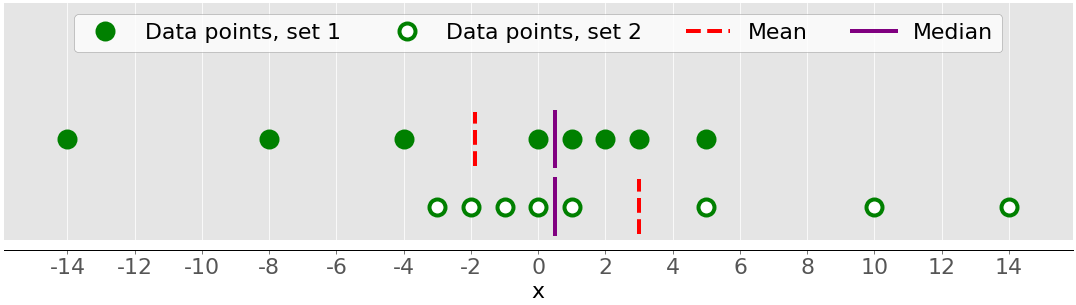

Python Statistics
The first set is represented by the green dots and the second with the white ones. Usually, negative skewness values indicate that there’s a dominant tail on the left side, which you can see with the first set. Positive skewness values correspond to a longer or fatter tail on the right side, which you can see in the second set. If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.

Once you’ve calculated the size of your dataset n, the sample mean mean_, and the standard deviation std_, you can get the sample skewness with pure Python:

In [1]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x)* n / ((n - 1) * (n - 2) * std_**3))
skew_


1.9470432273905929

Pandas Series objects have the method .skew() that also returns the skewness of a dataset:

In [ ]:
z

Like other methods, .skew() ignores nan values by default, because of the default value of the optional parameter skipna.



##Percentiles

The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. If there are two such elements in the dataset, then the sample 𝑝 percentile is their arithmetic mean. Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

* **The first quartile** is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
* **The second quartile** is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
* **The third quartile** is the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.

We can use **np.percentile()** to determine any sample percentile in your dataset. For example, this is how you can find the 5th and 95th percentiles:

In [9]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
y = np.array(x)

print(np.percentile(y, 5),np.percentile(y,25),np.percentile(y,75),np.percentile(y, 95))

-3.44 0.1 21.0 34.919999999999995


percentile() takes several arguments. You have to provide the dataset as the first argument and the percentile value as the second. The dataset can be in the form of a NumPy array, list, tuple, or similar data structure. The percentile can be a number between 0 and 100 like in the example above, but it can also be a sequence of numbers:

In [10]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

This code calculates the 25th, 50th, and 75th percentiles all at once. If the percentile value is a sequence, then percentile() returns a NumPy array with the results. The first statement returns the array of quartiles. The second statement returns the median, so you can confirm it’s equal to the 50th percentile, which is 8.0.

If you want to ignore nan values, then use np.nanpercentile() instead:

In [11]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [13]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

That’s how you can avoid nan values.

NumPy also offers you very similar functionality in quantile() and nanquantile()

If you use them, then you’ll need to provide the quantile values as the numbers between 0 and 1 instead of percentiles:

In [14]:
np.quantile(y, 0.05)

-3.44

In [15]:
np.quantile(y, 0.95)

34.919999999999995

In [16]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [17]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

The results are the same as in the previous examples, but here your arguments are between 0 and 1. In other words, you passed 0.05 instead of 5 and 0.95 instead of 95.

pd.Series objects have the method .quantile():

Remark: .quantile() also needs you to provide the quantile value as the argument. This value can be a number between 0 and 1 or a sequence of numbers. In the first case, .quantile() returns a scalar. In the second case, it returns a new Series holding the results.



In [18]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [ ]:
#pandas pecential 95?

In [ ]:
#pandas run each quatile

In [ ]:
#pandas with nan

##Range

The range of data is the difference between the maximum and minimum element in the dataset. You can get it with the function np.ptp():

In [19]:
np.ptp(y)

46.0

In [21]:
np.ptp(z)

46.0

In [22]:
np.ptp(y_with_nan)

nan

In [23]:
np.ptp(z_with_nan)

nan

This function returns nan if there are nan values in your NumPy array. If you use a Pandas Series object, then it will return a number.

Alternatively, you can use built-in Python, NumPy, or Pandas functions and methods to calculate the maxima and minima of sequences:

* max() and min() from the Python standard library
* amax() and amin() from NumPy
*nanmax() and nanmin() from NumPy to ignore nan values
* .max() and .min() from NumPy
* .max() and .min() from Pandas to ignore nan values by default

Here are some examples of how you would use these routines:



In [24]:
np.amax(y) - np.amin(y)



46.0

In [25]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [26]:
y.max() - y.min()

46.0

In [ ]:
#Try with pandas

That’s how you get the range of data.

The **interquartile** range is the difference between the first and third quartile. Once you calculate the quartiles, you can take their difference:

In [ ]:
##Try to build code here

#Summary of Descriptive Statistics

SciPy and Pandas offer useful routines to quickly get descriptive statistics with a single function or method call. You can use scipy.stats.describe() like this:

In [27]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

You have to provide the dataset as the first argument. The argument can be a NumPy array, list, tuple, or similar data structure. You can omit ddof=1 since it’s the default and only matters when you’re calculating the variance. You can pass bias=False to force correcting the skewness and kurtosis for statistical bias.

describe() returns an object that holds the following descriptive statistics:

* nobs: the number of observations or elements in your dataset
* minmax: the tuple with the minimum and maximum values of your dataset
* mean: the mean of your dataset
* variance: the variance of your dataset
* skewness: the skewness of your dataset
* kurtosis: the kurtosis of your dataset

You can access particular values with dot notation:

In [28]:
result.nobs

9

In [29]:
result.minmax[0] # Min

-5.0

In [30]:
result.minmax[1]  # Max

41.0

In [31]:
result.mean

11.622222222222222

In [32]:
result.variance

228.75194444444446

In [33]:
result.skewness

0.9249043136685094

In [34]:
result.kurtosis

0.14770623629658886

With SciPy, you’re just one function call away from a descriptive statistics summary for your dataset.

Pandas has similar, if not better, functionality. Series objects have the method .describe():

In [35]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

It returns a new Series that holds the following:

* count: the number of elements in your dataset
* mean: the mean of your dataset
* std: the standard deviation of your dataset
* min and max: the minimum and maximum values of your dataset
* 25%, 50%, and 75%: the quartiles of your dataset

If you want the resulting Series object to contain other percentiles, then you should specify the value of the optional parameter percentiles. You can access each item of result with its label:

In [36]:
result['mean']

11.622222222222222

In [37]:
result['std']

15.12454774346805

In [38]:
result['min']

-5.0

In [39]:
result['max']

41.0

In [40]:
result['25%']

0.1

In [41]:
result['50%']

8.0

In [42]:
result['75%']

21.0

#Measures of Correlation Between Pairs of Data

You’ll often need to examine the relationship between the corresponding elements of two variables in a dataset. Say there are two variables, 𝑥 and 𝑦, with an equal number of elements, 𝑛. Let 𝑥₁ from 𝑥 correspond to 𝑦₁ from 𝑦, 𝑥₂ from 𝑥 to 𝑦₂ from 𝑦, and so on. You can then say that there are 𝑛 pairs of corresponding elements: (𝑥₁, 𝑦₁), (𝑥₂, 𝑦₂), and so on.

You’ll see the following **measures of correlation** between pairs of data:

* **Positive correlation** exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
* **Negative correlation** exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
* **Weak or no correlation** exists if there is no such apparent relationship.

The following figure shows examples of negative, weak, and positive correlation:

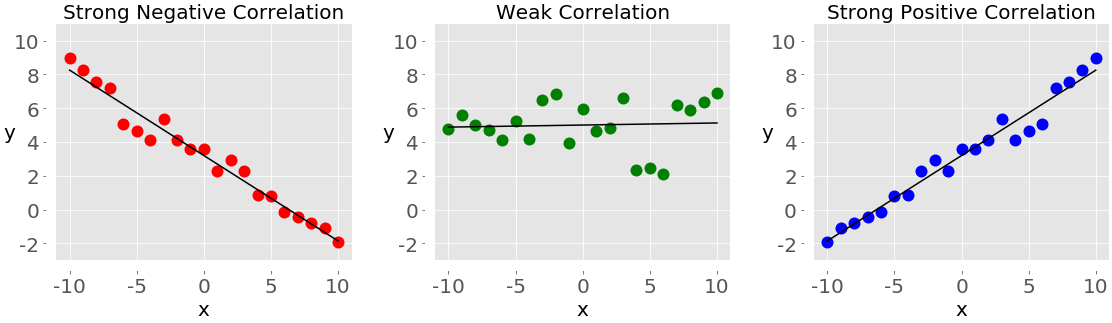

Python Statistics
The plot on the left with the red dots shows negative correlation. The plot in the middle with the green dots shows weak correlation. Finally, the plot on the right with the blue dots shows positive correlation.

*Note: There’s one important thing you should always have in mind when working with correlation among a pair of variables, and that’s that correlation is not a measure or indicator of causation, but only of association!*

The two statistics that measure the correlation between datasets are covariance and the correlation coefficient. Let’s define some data to work with these measures. You’ll create two Python lists and use them to get corresponding NumPy arrays and Pandas Series:

In [43]:
##Create sample data
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

Covariance
The sample covariance is a measure that quantifies the strength and direction of a relationship between a pair of variables:

If the correlation is positive, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
If the correlation is negative, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
If the correlation is weak, then the covariance is close to zero.
The covariance of the variables 𝑥 and 𝑦 is mathematically defined as 𝑠ˣʸ = Σᵢ (𝑥ᵢ − mean(𝑥)) (𝑦ᵢ − mean(𝑦)) / (𝑛 − 1), where 𝑖 = 1, 2, …, 𝑛, mean(𝑥) is the sample mean of 𝑥, and mean(𝑦) is the sample mean of 𝑦. It follows that the covariance of two identical variables is actually the variance: 𝑠ˣˣ = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1) = (𝑠ˣ)² and 𝑠ʸʸ = Σᵢ(𝑦ᵢ − mean(𝑦))² / (𝑛 − 1) = (𝑠ʸ)².

This is how you can calculate the covariance in pure Python:

(First, you have to find the mean of x and y. Then, you apply the mathematical formula for the covariance.)

In [44]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy

19.95

NumPy has the function cov() that returns the covariance matrix:

In [45]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

Note that cov() has the optional parameters bias, which defaults to False, and ddof, which defaults to None. Their default values are suitable for getting the sample covariance matrix. The upper-left element of the covariance matrix is the covariance of x and x, or the variance of x. Similarly, the lower-right element is the covariance of y and y, or the variance of y. You can check to see that this is true:

In [46]:
x_.var(ddof=1)

38.5

In [47]:
y_.var(ddof=1)

13.914285714285711

As you can see, the variances of x and y are equal to cov_matrix[0, 0] and cov_matrix[1, 1], respectively.

The other two elements of the covariance matrix are equal and represent the actual covariance between x and y:


#Correlation Coefficient

The correlation coefficient, or Pearson product-moment correlation coefficient, is denoted by the symbol 𝑟. The coefficient is another measure of the correlation between data. You can think of it as a standardized covariance. Here are some important facts about it:

* **The value 𝑟 > 0** indicates positive correlation.
* **The value 𝑟 < 0** indicates negative correlation.
* **The value r = 1** is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
* **The value r = −1** is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
* **The value r ≈ 0**, or when 𝑟 is around zero, means that the correlation between variables is weak.

The mathematical formula for the correlation coefficient is 𝑟 = 𝑠ˣʸ / (𝑠ˣ𝑠ʸ) where 𝑠ˣ and 𝑠ʸ are the standard deviations of 𝑥 and 𝑦 respectively. If you have the means (mean_x and mean_y) and standard deviations (std_x, std_y) for the datasets x and y, as well as their covariance cov_xy, then you can calculate the correlation coefficient with pure Python:

In [48]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

You’ve got the variable r that represents the correlation coefficient.

scipy.stats has the routine pearsonr() that calculates the correlation coefficient and the 𝑝-value:

In [ ]:
You’ve got the variable r that represents the correlation coefficient.

scipy.stats has the routine pearsonr() that calculates the correlation coefficient and the 𝑝-value:

In [49]:
r, p = scipy.stats.pearsonr(x_, y_)
print(r,p)

0.8619500056316061 5.122760847201135e-07



pearsonr() returns a tuple with two numbers. The first one is 𝑟 and the second is the 𝑝-value.

Similar to the case of the covariance matrix, you can apply np.corrcoef() with x_ and y_ as the arguments and get the correlation coefficient matrix:

In [50]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

The upper-left element is the correlation coefficient between x_ and x_. The lower-right element is the correlation coefficient between y_ and y_. Their values are equal to 1.0. The other two elements are equal and represent the actual correlation coefficient between x_ and y_:

Of course, the result is the same as with pure Python and pearsonr().

You can get the correlation coefficient with scipy.stats.linregress():

In [51]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979)